<a href="https://colab.research.google.com/github/mako-commits/Pump-it-up/blob/main/Pump_It.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**# Pump It Predict**

*Authors: Gemelyn Barrogo, Shweta Mishra, Mubarak Mustapha*

For this project, we will be using three different Machine Learning Models to predict whether a pump is functional, needs repair, or non-functional. A comparative analysis between the performance of these models (Logistic regression and Random Forest from Scikit-Learn, and Neural Network using TensorFlow) is done to assess which would give a better performance.


### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Feature engineering libraries
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

# Visualization
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

# TensorFlow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Part One - Data Preprocessing
The dataset taken from Kaggle for this challenge was already divided into X_train, X_test, and y_train, and we noted that y_test wasn't given. Due to this nature, we decided to combine the X_train and y_train csv files and call it as Train.csv, which still has a lot of data for training. We then split this into training and testing dataset later on so that we can test the accuracy of the models with new data which has not been seen or trained with before. Doing so ensures that we have all the actual labels of the training and testing dataset for easier comparison to check how well each chosen model compares to the others.

In [ ]:
# Load dataset
pump_data = pd.read_csv("pump_dataset.csv")


In [ ]:
#print shape of data
print('Pump data', pump_data.shape)

Pump data (44550, 41)


## Data Visualization

In [ ]:
# View table head
pump_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [ ]:
pump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

In [ ]:
#Get more information about data features
pump_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,44550.0,37192.623681,21399.827198,1.000000,18723.250000,37183.500000,55647.500000,7.424700e+04
amount_tsh,44550.0,307.623224,2402.742799,0.000000,0.000000,0.000000,20.000000,1.700000e+05
gps_height,44550.0,665.490774,693.653179,-90.000000,0.000000,363.000000,1318.000000,2.770000e+03
longitude,44550.0,34.084084,6.555924,0.000000,33.105585,34.905600,37.176859,4.034519e+01
latitude,44550.0,-5.721980,2.948828,-11.648378,-8.574241,-5.045611,-3.327795,-2.000000e-08
num_private,44550.0,0.521549,13.835868,0.000000,0.000000,0.000000,0.000000,1.776000e+03
region_code,44550.0,15.338563,17.672144,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,44550.0,5.678967,9.724205,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,44550.0,179.112750,478.995645,0.000000,0.000000,25.000000,210.000000,3.050000e+04
construction_year,44550.0,1295.782155,953.183961,0.000000,0.000000,1985.000000,2004.000000,2.013000e+03


In [ ]:
print(pump_data.value_counts())

id     amount_tsh  date_recorded  funder        gps_height  installer     longitude  latitude    wpt_name           num_private  basin                    subvillage  region     region_code  district_code  lga           ward       population  public_meeting  recorded_by              scheme_management  scheme_name                  permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management   management_group  payment         payment_type  water_quality  quality_group  quantity      quantity_group  source                source_type           source_class  waterpoint_type              waterpoint_type_group  status_group  
2      0.0         2011-03-27     Lvia          0           LVIA          36.115056  -6.279268   Bombani            0            Wami / Ruvu              Songambele  Dodoma     1            4              Chamwino      Msamalo    0           True            GeoData Consultants Ltd  VWC                Mgun                         Tr

# Feature Engineering (Data preprocessing)


## Feature Selection
After exploring the dataset, and upon looking further into each feature, we can reduce the complexity and size of our data by choosing the relevant features carefully. This part is broken down into several steps
1. Dropping Similar columns
2. Dropping irrelevant columns
3. Dropping columns with High Cardinality

### 1. Selecting features among Similar columns

Some features hold similar information with other features, so we dropped the unnecessary features and retained the relevant ones.
Similar features include the following (we retained the bolded columns and dropped the others):
* scheme_management, scheme_name, ***management***, management_group
* ***quantity***, quantity_group
* source_class, source_type, ***source***
* ***water_quality***, quality_group
* ***payment***, payment_type
* extraction_type, ***extraction_type_group***, extraction_type_class
* ***waterpoint_type***, waterpoint_type_group, wpt_name
* ***region***, region_code
* subvillage, ***distric_code***




In [ ]:
# insert code here on comparing value_counts of every similar group,
# then we will choose the one with the lowest count of categories, and drop the others
#print(pump_data['scheme_management', 'scheme_name', 'management', 'management_group'].value_counts())

In [ ]:
pump_data = pump_data.drop(['management_group','scheme_management','quantity_group','source_class','source_type','quality_group',
                'payment_type','extraction_type_class','extraction_type', 'wpt_name','scheme_name','region_code', 'waterpoint_type_group','subvillage'],axis=1)


### 2. Dropping irrelevant/uninformative features

By exploring the columns deeper, more features are seen to be irrelevant and does not add any value to our dataset, so these features are dropped. These columns that are intuitively found to be not helpful to the prediction are identified below:
* id
* recorded_by
* date_recorded
* num_private


In [ ]:
# determine how many 0 values each column has
zero_rows_count = pump_data[pump_data == 0].count()

# Print the results
print(zero_rows_count)

id                           0
amount_tsh               31231
date_recorded                0
funder                       0
gps_height               15441
installer                    0
longitude                 1354
latitude                     0
num_private              43964
basin                        0
region                       0
district_code               18
lga                          0
ward                         0
population               16150
public_meeting            3847
recorded_by                  0
permit                   13157
construction_year        15641
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
status_group                 0
dtype: int64


In [ ]:
pump_data['recorded_by'].value_counts()

GeoData Consultants Ltd    44550
Name: recorded_by, dtype: int64

In [ ]:
# The "recorded_by" contains only one value, hence does not give additional information to the dataset. so we drop it
pump_data.drop(columns=['recorded_by'],inplace=True )

# The 'id' feature is unique to every pump and doesn't provide any info about the functionality of the pump

In [ ]:
pump_data.drop(columns=['date_recorded'],inplace=True )
pump_data.drop(columns=['id'],inplace=True )

In [ ]:
#This column has no information about it and also mostly have zero values. So, we drop this also.
pump_data.drop(columns=['num_private'],inplace=True )

### 3. Dropping Features with High Cardinality

A categorical feature is said to have High Cardinality if it has a large number of unique values (in this case, large is considered columns with greater than 150 unique categories). It also expresses huge variability of values in a discrete feature, which means encoding that categorical column would make the dataset extremely complicated.


In [ ]:
# define a function that checks for cardinality and returns the features with high number of categories

def cardinality_check(n, df):

  feature_list = []

  card_value = []

  for _ in range(len(df.columns)):
    if len(df[df.columns[_]].value_counts()) > n:

      feature_list.append(df.columns[_])

      card_value.append(len(df[df.columns[_]].value_counts()))


  feature_dict = dict(zip(feature_list, card_value))

  return feature_dict

In [ ]:
high_card_dict = cardinality_check(150, pump_data)
high_card_dict

{'funder': 1651,
 'gps_height': 2396,
 'installer': 1854,
 'longitude': 43155,
 'latitude': 43155,
 'ward': 2080,
 'population': 956}

In [ ]:
# drop all high cardinality features except latitude and longitude and population since they are numerical
pump_data.drop(columns=['funder'],inplace=True)
pump_data.drop(columns=['ward'],inplace=True)
pump_data.drop(columns=['installer'],inplace=True)
pump_data.drop(columns=['gps_height'],inplace=True)   # 34% of gps_height = 0 so we can drop it as well

## Cleaning of Data

The remaining features are explored and checked for null values. They are then filled appropriately.

In [ ]:
pump_data.head()

,amount_tsh,longitude,latitude,basin,region,district_code,lga,population,public_meeting,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,7.0,37.228664,-3.256505,Pangani,Kilimanjaro,5,Hai,90,True,True,2008,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional
1,0.0,34.615481,-9.972601,Lake Nyasa,Iringa,5,Ludewa,70,False,False,1984,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional
2,0.0,36.658778,-3.321529,Pangani,Arusha,2,Arusha Rural,150,True,True,2002,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional
3,0.0,33.628025,-8.860795,Rufiji,Mbeya,2,Mbeya Rural,0,True,True,0,gravity,wug,pay annually,soft,insufficient,river,communal standpipe,functional
4,300.0,37.655509,-3.669777,Pangani,Kilimanjaro,2,Mwanga,34,True,False,2007,gravity,vwc,pay monthly,soft,insufficient,spring,communal standpipe,functional


### Checking the unique values of each feature

In [ ]:
pump_data['amount_tsh'].value_counts()

0.0        31231
500.0       2321
50.0        1881
20.0        1117
1000.0      1116
           ...  
26.0           1
11000.0        1
9.0            1
6300.0         1
900.0          1
Name: amount_tsh, Length: 85, dtype: int64

In [ ]:
#70% of the "amount_tsh" column has no informative values as most are zero values, hence we drop it
pump_data.drop(columns=['amount_tsh'],inplace=True )

### Filling null or 0 values

In [ ]:
pump_data['public_meeting'].value_counts()

True     38212
False     3847
Name: public_meeting, dtype: int64

In [ ]:
#We decided keep this column as it provide meaning information and also fill the null values with the moost common value in the coulmn which is "True"
pump_data['public_meeting'].fillna(value=True,inplace=True)

In [ ]:
pump_data['permit'].value_counts()

True     29057
False    13157
Name: permit, dtype: int64

In [ ]:
#Permit is also an important feature as it tells us if the water point is permitted or not. We also fill the null values with the most common value which is "True"
pump_data['permit'].fillna(value=True, inplace=True)

In [ ]:
#  pre-processing for population feature

pop_mean = np.mean(pump_data['population']!=0)
pump_data['population'] = pump_data['population'].replace(0, np.nan)
pop_mean = np.mean(pump_data['population'])
print('mean', pop_mean)
pump_data['population'] = pump_data['population'].replace(np.nan, round(pop_mean))
pump_data['population'].value_counts()



mean 280.96735915492957


281.0     16153
1.0        5280
200.0      1429
150.0      1427
250.0      1259
          ...  
1032.0        1
2813.0        1
6854.0        1
6300.0        1
1745.0        1
Name: population, Length: 955, dtype: int64

In [ ]:
# fill 0 values for construction year with mean for training dataset
pump_data['construction_year'] = pump_data['construction_year'].replace(0, np.nan)
mean = pump_data['construction_year'].mean()
print(mean)
avg_age = round(mean)
pump_data['construction_year'] = pump_data['construction_year'].replace(np.nan, avg_age)

pump_data['construction_year']
pump_data.info()

1996.8554775329483
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              44550 non-null  float64
 1   latitude               44550 non-null  float64
 2   basin                  44550 non-null  object 
 3   region                 44550 non-null  object 
 4   district_code          44550 non-null  int64  
 5   lga                    44550 non-null  object 
 6   population             44550 non-null  float64
 7   public_meeting         44550 non-null  bool   
 8   permit                 44550 non-null  bool   
 9   construction_year      44550 non-null  float64
 10  extraction_type_group  44550 non-null  object 
 11  management             44550 non-null  object 
 12  payment                44550 non-null  object 
 13  water_quality          44550 non-null  object 
 14  quantity               44550 non-nu

In [ ]:
pump_data['district_code'].value_counts()

1     9110
2     8280
3     7538
4     6744
5     3325
6     3055
7     2547
8      759
30     752
33     662
53     585
43     383
13     278
23     224
63     146
62      78
60      50
0       18
80      10
67       6
Name: district_code, dtype: int64

In [ ]:
pump_data['age'] = 2023 - pump_data['construction_year']

In [ ]:
#We dropped the construction
pump_data.drop(columns=['construction_year'],inplace=True )

In [ ]:
pump_data.head()

,longitude,latitude,basin,region,district_code,lga,population,public_meeting,permit,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group,age
0,37.228664,-3.256505,Pangani,Kilimanjaro,5,Hai,90.0,True,True,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional,15.0
1,34.615481,-9.972601,Lake Nyasa,Iringa,5,Ludewa,70.0,False,False,gravity,private operator,never pay,soft,enough,spring,communal standpipe,functional,39.0
2,36.658778,-3.321529,Pangani,Arusha,2,Arusha Rural,150.0,True,True,gravity,vwc,never pay,soft,insufficient,spring,communal standpipe,non functional,21.0
3,33.628025,-8.860795,Rufiji,Mbeya,2,Mbeya Rural,281.0,True,True,gravity,wug,pay annually,soft,insufficient,river,communal standpipe,functional,26.0
4,37.655509,-3.669777,Pangani,Kilimanjaro,2,Mwanga,34.0,True,False,gravity,vwc,pay monthly,soft,insufficient,spring,communal standpipe,functional,16.0


In [ ]:
print('Training Dataset', pump_data.shape)


Training Dataset (44550, 18)


In [ ]:
pump_data.isna().sum().sort_values(ascending=False)

longitude                0
latitude                 0
status_group             0
waterpoint_type          0
source                   0
quantity                 0
water_quality            0
payment                  0
management               0
extraction_type_group    0
permit                   0
public_meeting           0
population               0
lga                      0
district_code            0
region                   0
basin                    0
age                      0
dtype: int64

## Encoding the features

It is important to identify the different kinds of features and setting the appropriate data type before we start encoding. We identified three kinds of features, boolean, categorical, and numerical.

### Determining the numerical and categorical features

In [ ]:
pump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              44550 non-null  float64
 1   latitude               44550 non-null  float64
 2   basin                  44550 non-null  object 
 3   region                 44550 non-null  object 
 4   district_code          44550 non-null  int64  
 5   lga                    44550 non-null  object 
 6   population             44550 non-null  float64
 7   public_meeting         44550 non-null  bool   
 8   permit                 44550 non-null  bool   
 9   extraction_type_group  44550 non-null  object 
 10  management             44550 non-null  object 
 11  payment                44550 non-null  object 
 12  water_quality          44550 non-null  object 
 13  quantity               44550 non-null  object 
 14  source                 44550 non-null  object 
 15  wa

In [ ]:
# Looking at the pump_data head, we can see that 2 features are of boolean form.
# For smoother analysis, we considered these boolean features as integer

pump_data['permit'] = pump_data['permit'].astype(bool).astype(int)
pump_data['public_meeting'] = pump_data['public_meeting'].astype(bool).astype(int)

boolean_features = ['public_meeting', 'permit']

In [ ]:
# convert the categorical features into 'category' type instead of 'object' type

categorical_features = ['basin', 'region', 'district_code', 'lga', 'extraction_type_group', 'management',
                        'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type']
pump_data[categorical_features] = pump_data[categorical_features].astype('category')

In [ ]:
pump_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   longitude              44550 non-null  float64 
 1   latitude               44550 non-null  float64 
 2   basin                  44550 non-null  category
 3   region                 44550 non-null  category
 4   district_code          44550 non-null  category
 5   lga                    44550 non-null  category
 6   population             44550 non-null  float64 
 7   public_meeting         44550 non-null  int64   
 8   permit                 44550 non-null  int64   
 9   extraction_type_group  44550 non-null  category
 10  management             44550 non-null  category
 11  payment                44550 non-null  category
 12  water_quality          44550 non-null  category
 13  quantity               44550 non-null  category
 14  source                 44550 non-null 

In [ ]:
# identifying the numerical features for easier scaling later on

numerical_features = ['longitude', 'latitude', 'population', 'age']
print('num', numerical_features)


num ['longitude', 'latitude', 'population', 'age']


Aside from convenience when it comes to the scaling part, another benefit of identifying the numerical features is that we can see the correlation between these features.

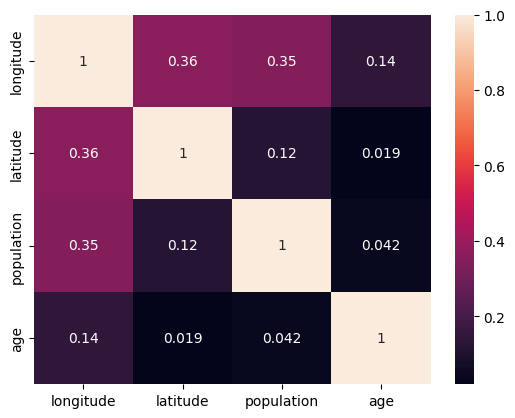

In [ ]:
corrmat = pump_data[numerical_features].corr(method='spearman')
sns.heatmap(abs(corrmat), annot=True)
plt.show()


Looking at the correlation matrix of the numerical features, we can see that there is little to no relation between the columns, so we can consider all of these features for our model. Their may be a slight correlation between the latitude and population, but this is might be due to the population being denser at certain geographic locations.

### Encoding the target vector

In [ ]:
target_status_group = {'functional':0,
                    'functional needs repair': 1,
                   'non functional': 2}
pump_data['status_group'] = pump_data['status_group'].replace(target_status_group)

### Encoding the categorical features

In [ ]:
# encode first before splitting

encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(pump_data[categorical_features]).toarray()
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(categorical_features))


# combine the encoded data with the numerical and boolean features

X = pd.concat([pump_data[numerical_features], x_encoded_df, pump_data[boolean_features]], axis=1)

X.head()

,longitude,latitude,population,age,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,public_meeting,permit
0,37.228664,-3.256505,90.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,34.615481,-9.972601,70.0,39.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,36.658778,-3.321529,150.0,21.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
3,33.628025,-8.860795,281.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1
4,37.655509,-3.669777,34.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0


### Splitting the Data before Scaling

In [ ]:
# Splitting the dataset into training and validation
y = pump_data["status_group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

###Scaling the numerical features

In [ ]:
# after splitting, we can implement scaler on the training set and test set
# separately so we can avoid data leakage

scaler = MinMaxScaler()
x_train_num = scaler.fit_transform(X_train[numerical_features])
X_train_num_df = pd.DataFrame(x_train_num, columns=numerical_features)

x_test_num = scaler.fit_transform(X_test[numerical_features])
X_test_num_df = pd.DataFrame(x_test_num, columns=numerical_features)

# we need to apply the normalized numerical features to the original dataset

X_train[numerical_features] = x_train_num
X_test[numerical_features] = x_test_num

In [ ]:
print(y_train.shape)
print(X_train.shape)

(33412,)
(33412, 243)


# Part Two - Implementing different Models

##  Logistic Regression Model

In [ ]:
# Initializing Logistic Regression model
logreg = LogisticRegression()
y_df = pd.DataFrame(y_train)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr = logreg.predict(X_test)
lg_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lg_accuracy)

Accuracy: 0.736667265218172


### Accuracy Metrics for Logistic Regression

In [ ]:
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy: {lg_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.736667265218172
Precision: 0.7277504632572332
Recall: 0.736667265218172
F1-score: 0.7168841183550043


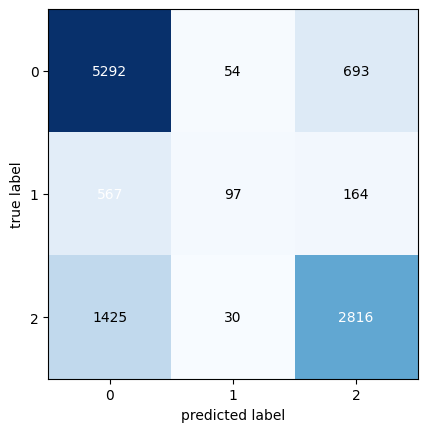

In [ ]:
#Show confusion matrix
confusion_lg = confusion_matrix(y_test, y_pred_lr)

plot_confusion_matrix(confusion_lg)
plt.show()

## Random Forest Model

In [ ]:
# Initializing Random Forest model
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'max_depth': [25, 26, 27, 28],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [8, 10, 12]
}

gridsearch = RandomizedSearchCV(
    RandomForestClassifier(n_estimators=92, n_jobs=-1, random_state=42),
    param_distributions=param_distributions,
    n_iter=5,       # the number of random combinations of hyperparameters to try
    cv=5,           # the number of cross-validation folds to use during training and evaluation
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

# model Fitting
gridsearch.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=92, n_jobs=-1,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [25, 26, 27, 28],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [8, 10, 12]},
                   return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
results = pd.DataFrame(gridsearch.cv_results_)    # creating a panda DataFrame object from the results of the hyperparameter search
print(f'Best result from search of {len(results)} parameter combinations')
results.sort_values(by='rank_test_score').head(5) # showning the best scores first

Best result from search of 5 parameter combinations


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,9.104053,0.618277,0.359705,0.063339,8,sqrt,27,"{'min_samples_split': 8, 'max_features': 'sqrt...",0.797995,0.794254,...,0.798576,0.004300,1,0.881140,0.883984,0.884961,0.883315,0.883427,0.883365,0.001256
3,9.092888,0.611312,0.370741,0.036396,8,auto,27,"{'min_samples_split': 8, 'max_features': 'auto...",0.797995,0.794254,...,0.798576,0.004300,1,0.881140,0.883984,0.884961,0.883315,0.883427,0.883365,0.001256
4,8.199795,1.991761,0.280497,0.081309,12,auto,26,"{'min_samples_split': 12, 'max_features': 'aut...",0.796648,0.792159,...,0.796600,0.003609,3,0.859890,0.859217,0.860681,0.859259,0.860456,0.859901,0.000600
2,8.815290,0.521050,0.386687,0.100790,10,auto,25,"{'min_samples_split': 10, 'max_features': 'aut...",0.796648,0.790813,...,0.796510,0.003931,4,0.863594,0.864529,0.864908,0.862851,0.863562,0.863889,0.000738
0,9.780401,1.173316,0.353572,0.035655,12,auto,27,"{'min_samples_split': 12, 'max_features': 'aut...",0.795451,0.795002,...,0.795433,0.003094,5,0.861424,0.863257,0.863711,0.860269,0.861504,0.862033,0.001271


In [ ]:
model_rf = gridsearch.best_estimator_

In [ ]:
def con_matrix(model):   # defining a function and taking "model" as the input
  x = model.predict(X_train)   # predicting on training data and storing in x
  y = y_train            # actual target values stored in y

  print(classification_report(y, x, target_names=['Functional', 'Needs Repair', 'Not-Functional']))

# Computing the confusion matrix as a 2D array, index = actual target values and columns = predicated values

  con_matrix = pd.DataFrame(confusion_matrix(y, x),
             columns=['Predicted Functional', 'Predicted Needs Repair', 'Predicted Not-Functional'],
             index=['Actual Functional', 'Actual Needs Repair', 'Actual Not-Functional'])

# Heatmap Visualization

  sns.heatmap(data=con_matrix, cmap='cool')
  cm = confusion_matrix(y,x)
  plot_confusion_matrix(cm)

  plt.show();
  return con_matrix

                precision    recall  f1-score   support

    Functional       0.85      0.97      0.91     18155
  Needs Repair       0.87      0.40      0.55      2410
Not-Functional       0.94      0.85      0.89     12847

      accuracy                           0.88     33412
     macro avg       0.89      0.74      0.78     33412
  weighted avg       0.89      0.88      0.88     33412



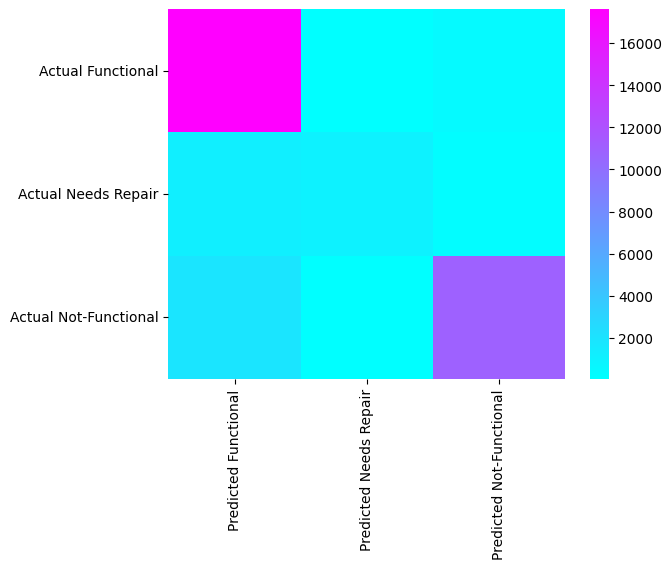

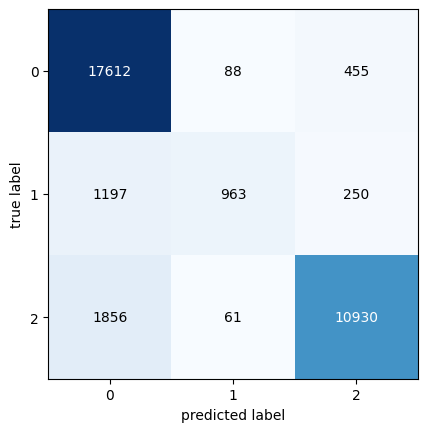

,Predicted Functional,Predicted Needs Repair,Predicted Not-Functional
Actual Functional,17612,88,455
Actual Needs Repair,1197,963,250
Actual Not-Functional,1856,61,10930


In [ ]:
con_matrix(model_rf)

Random Forest Accuracy:  0.7894595079906626


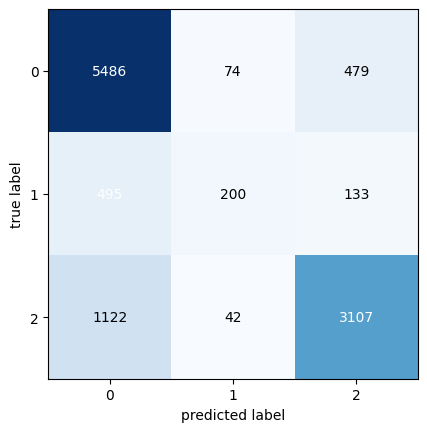

In [ ]:
y_pred_rf = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy: ', rf_accuracy)

confusion_rf = confusion_matrix(y_test, y_pred_rf)

plot_confusion_matrix(confusion_rf)
plt.show()

##Tensor Flow Model

In [ ]:
# Convert dataset (NumPy array) to a TensorFlow tensor
train_data_tensor = tf.convert_to_tensor(X_train)
train_labels_tensor = tf.convert_to_tensor(y_train)

In [ ]:
"""
def create_model(neurons=64, hidden_layers=1, optimizer='adam'):
    tf_model = tf.keras.Sequential()
    tf_model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(243,)))
    for i in range(hidden_layers):
        tf_model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))
    tf_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return tf_model
"""

"\ndef create_model(neurons=64, hidden_layers=1, optimizer='adam'):\n    tf_model = tf.keras.Sequential()\n    tf_model.add(tf.keras.layers.Dense(neurons, activation='relu', input_shape=(243,)))\n    for i in range(hidden_layers):\n        tf_model.add(tf.keras.layers.Dense(neurons, activation='relu'))\n    tf_model.add(tf.keras.layers.Dense(10, activation='softmax'))\n    tf_model.compile(optimizer=optimizer,\n                  loss='sparse_categorical_crossentropy',\n                  metrics=['accuracy'])\n    return tf_model\n"

In [ ]:
#tf_model = KerasClassifier(build_fn=create_model, verbose=0)

### Hyperparameter Tuning

In [ ]:
#hyperparameters to tune
"""
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'hidden_layers': [1, 2, 3],
    'neurons': [64, 128, 256]
}
"""

"\nparam_grid = {\n    'batch_size': [16, 32, 64],\n    'epochs': [10, 20, 30],\n    'optimizer': ['adam', 'sgd', 'rmsprop'],\n    'hidden_layers': [1, 2, 3],\n    'neurons': [64, 128, 256]\n}\n"

In [ ]:
# grid search cross-validation
"""
grid = GridSearchCV(estimator=tf_model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)
"""

'\ngrid = GridSearchCV(estimator=tf_model, param_grid=param_grid, cv=3)\ngrid_result = grid.fit(X_train, y_train)\n'

In [ ]:
# print the best parameters and accuracy
"""
print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: ", grid_result.best_score_)
"""

'\nprint("Best parameters: ", grid_result.best_params_)\nprint("Best accuracy: ", grid_result.best_score_)\n'

### Training the model

In [ ]:
# initiate model
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(243,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile model
model_mlp.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model
model_mlp.fit(train_data_tensor, train_labels_tensor, epochs=10, batch_size=32)

Epoch 1/10
1045/1045 [==============================] - 3s 2ms/step - loss: 0.6541 - accuracy: 0.7333
Epoch 2/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.5631 - accuracy: 0.7654
Epoch 3/10
1045/1045 [==============================] - 3s 3ms/step - loss: 0.5372 - accuracy: 0.7776
Epoch 4/10
1045/1045 [==============================] - 3s 3ms/step - loss: 0.5206 - accuracy: 0.7837
Epoch 5/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.5055 - accuracy: 0.7896
Epoch 6/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4944 - accuracy: 0.7950
Epoch 7/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4859 - accuracy: 0.8002
Epoch 8/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.4778 - accuracy: 0.7995
Epoch 9/10
1045/1045 [==============================] - 3s 3ms/step - loss: 0.4700 - accuracy: 0.8054
Epoch 10/10
1045/1045 [==============================] - 2s 2ms/step - loss: 0.462

In [ ]:
loss, tft_accuracy = model_mlp.evaluate(X_train, y_train,  batch_size = 10, verbose=2)
print("\n Training Accuracy:", tft_accuracy)

3342/3342 - 4s - loss: 0.4383 - accuracy: 0.8159 - 4s/epoch - 1ms/step

 Training Accuracy: 0.815934419631958


In [ ]:
# Make predictions on test data
predictions = model_mlp.predict(X_test)
y_pred_tf = np.argmax(predictions, axis=1)

tf_accuracy = accuracy_score(y_test, y_pred_tf)
print("Test Accuracy:", tf_accuracy)

349/349 [==============================] - 1s 1ms/step
Test Accuracy: 0.7696175255880768


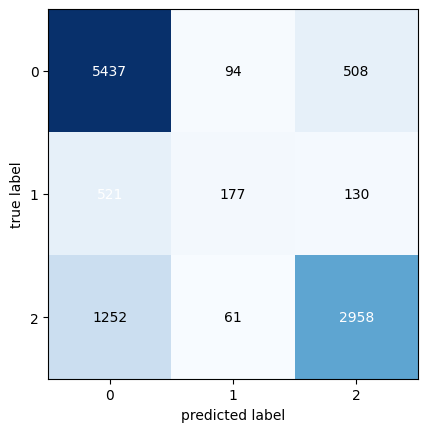

Precision: 0.7032682382700685
Recall: 0.6022201960628631
F1 score: 0.6259718785398066


In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred_tf, average='macro')
recall = recall_score(y_test, y_pred_tf, average='macro')
f1 = f1_score(y_test, y_pred_tf, average='macro')

# Compute the confusion matrix of the model
tf_confusion = confusion_matrix(y_test, y_pred_tf)
plot_confusion_matrix(tf_confusion)
plt.show()

# Print scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

The top left value (5353) represents the number of instances that were actually in class 0 and were predicted as class 0.

The middle value in the first row (130) represents the number of instances that were actually in class 0 but were predicted as class 1.

The last value in the first row (556) represents the number of instances that were actually in class 0 but were predicted as class 2.

The second row represents class 1, and the values follow a similar interpretation as for class 0.

The third row represents class 2, and the values follow a similar interpretation as for classes 0 and 1.

In [ ]:
print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      6039
           1       0.53      0.21      0.31       828
           2       0.82      0.69      0.75      4271

    accuracy                           0.77     11138
   macro avg       0.70      0.60      0.63     11138
weighted avg       0.76      0.77      0.76     11138



# Part Three - Results and Comparisons

In [ ]:
# Compare accuracy results from each model
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Tensor Flow'],
    'Testing Accuracy': [lg_accuracy * 100, rf_accuracy * 100, tf_accuracy * 100]
})

accuracies

,Model,Testing Accuracy
0,Logistic Regression,73.666727
1,Random Forest,78.945951
2,Tensor Flow,76.961753


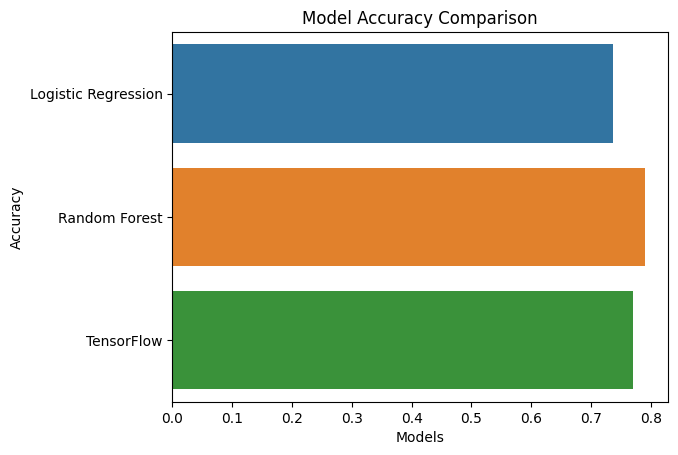

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

# Create a bar graph of model accuracy
models = ['Logistic Regression', 'Random Forest', 'TensorFlow']
accuracies = [accuracy_lr, accuracy_rf, accuracy_tf]

# Create a bar graph using Seaborn
sns.barplot(x=accuracies, y=models, orient='h')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Model Accuracy Comparison')
plt.show()

From the accuracy results, it can be seen that the random forest had the best accuracy of 79% followed by the tensor flow model with an accuracy of 77% and logistic regression of 74%

In [ ]:
class_counts = np.bincount(y_test)

# Print class counts
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} occurrences")

Class 0: 6039 occurrences
Class 1: 828 occurrences
Class 2: 4271 occurrences


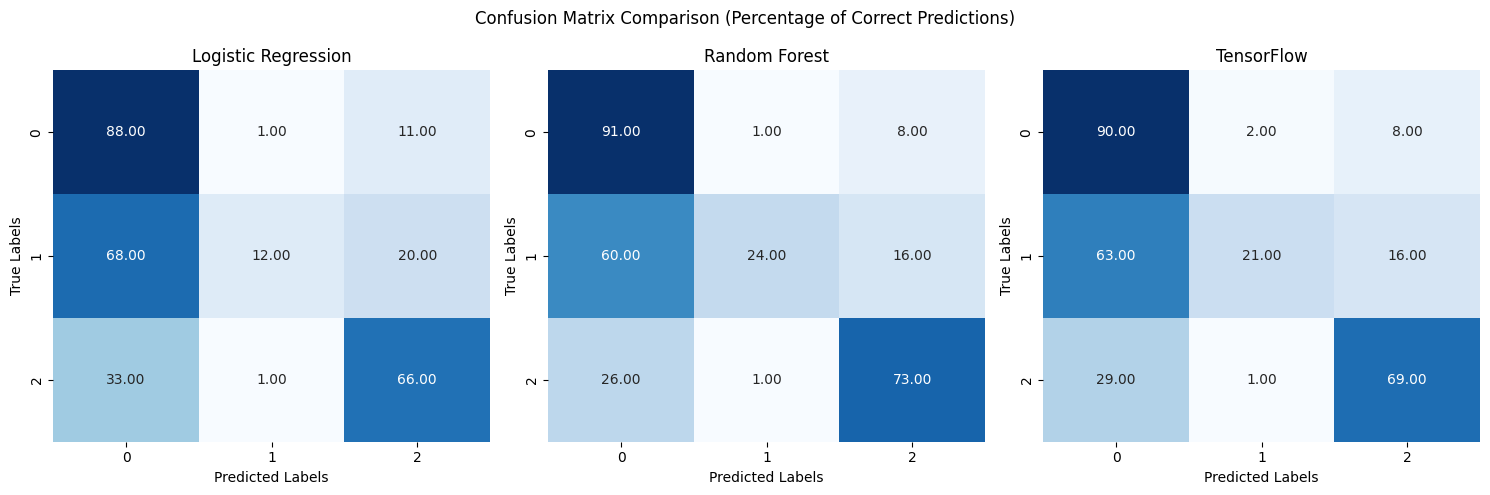

In [ ]:
# Compute confusion matrices for each model
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_tf = confusion_matrix(y_test, y_pred_tf)

# Calculate percentage of correct predictions for each class
percentage_matrix_lr = np.round(cm_lr.astype('float') / cm_lr.sum(axis=1)[:, np.newaxis], 2) * 100
percentage_matrix_rf = np.round(cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis], 2) * 100
percentage_matrix_tf = np.round(cm_tf.astype('float') / cm_tf.sum(axis=1)[:, np.newaxis], 2) * 100

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot confusion matrix for Logistic Regression
sns.heatmap(percentage_matrix_lr, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')
axes[0].set_title('Logistic Regression')

# Plot confusion matrix for Random Forest
sns.heatmap(percentage_matrix_rf, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axes[1])
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')
axes[1].set_title('Random Forest')

# Plot confusion matrix for TensorFlow
sns.heatmap(percentage_matrix_tf, annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=axes[2])
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')
axes[2].set_title('TensorFlow')

plt.suptitle('Confusion Matrix Comparison (Percentage of Correct Predictions)')
plt.tight_layout()
plt.show()